In [1]:
# Importing libraries
import pandas as pd

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Splitting data into training and testing set
from sklearn.model_selection import train_test_split

# Import the LabelEncoder module
from sklearn.preprocessing import LabelEncoder

# Modules for evaluation metrics
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from subprocess import call

#Importing the tabulate module to format data into a table
from tabulate import tabulate

In [2]:
# Read the Titanic dataset from a CSV file into a DataFrame
df = pd.read_csv("titanic.csv")

# Display the first few rows of the DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Understanding the structure and characteristics of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Dropping unnecessary columns
df = df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)
# PassengerId: Does not provide any useful information for predicting survival.
# Name: Does not provide any useful information for predicting survival
# Ticket: Contains alphanumeric values, which might not have a direct correlation with survival.
# Cabin: High number of missing values (NaN)

In [5]:
# Checking for missing data
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

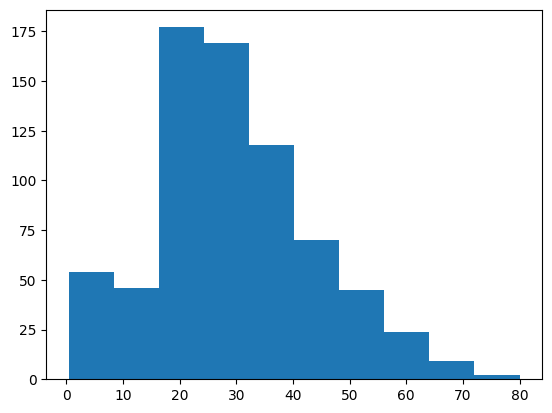

In [6]:
# Examining the distribution of the Age column to address any missing data
plt.hist(df['Age'])
plt.show()

In [7]:
# Using meadian to fill in missing data

# Calculate median
median_age = df['Age'].median()

# Impute missing age values with median
df['Age'] = df['Age'].fillna(median_age)

# Dropping x2 nan values
df = df.dropna(subset=['Embarked'])

# Checking changes
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [8]:
# Get the data types of all columns
data_types = df.dtypes

# Loop through each column
for column, data_type in data_types.items():  # Use items() to iterate through column and data_type
    if data_type == 'object':
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Sex': ['male' 'female']
Unique values in column 'Embarked': ['S' 'C' 'Q']


In [9]:
# Encoding categorical features 

# Initialise the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the "Sex" column
df['Sex'] = encoder.fit_transform(df['Sex'])

# Fit and transform the "Embarked" column
df['Embarked'] = encoder.fit_transform(df['Embarked'])

# Checking changes
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


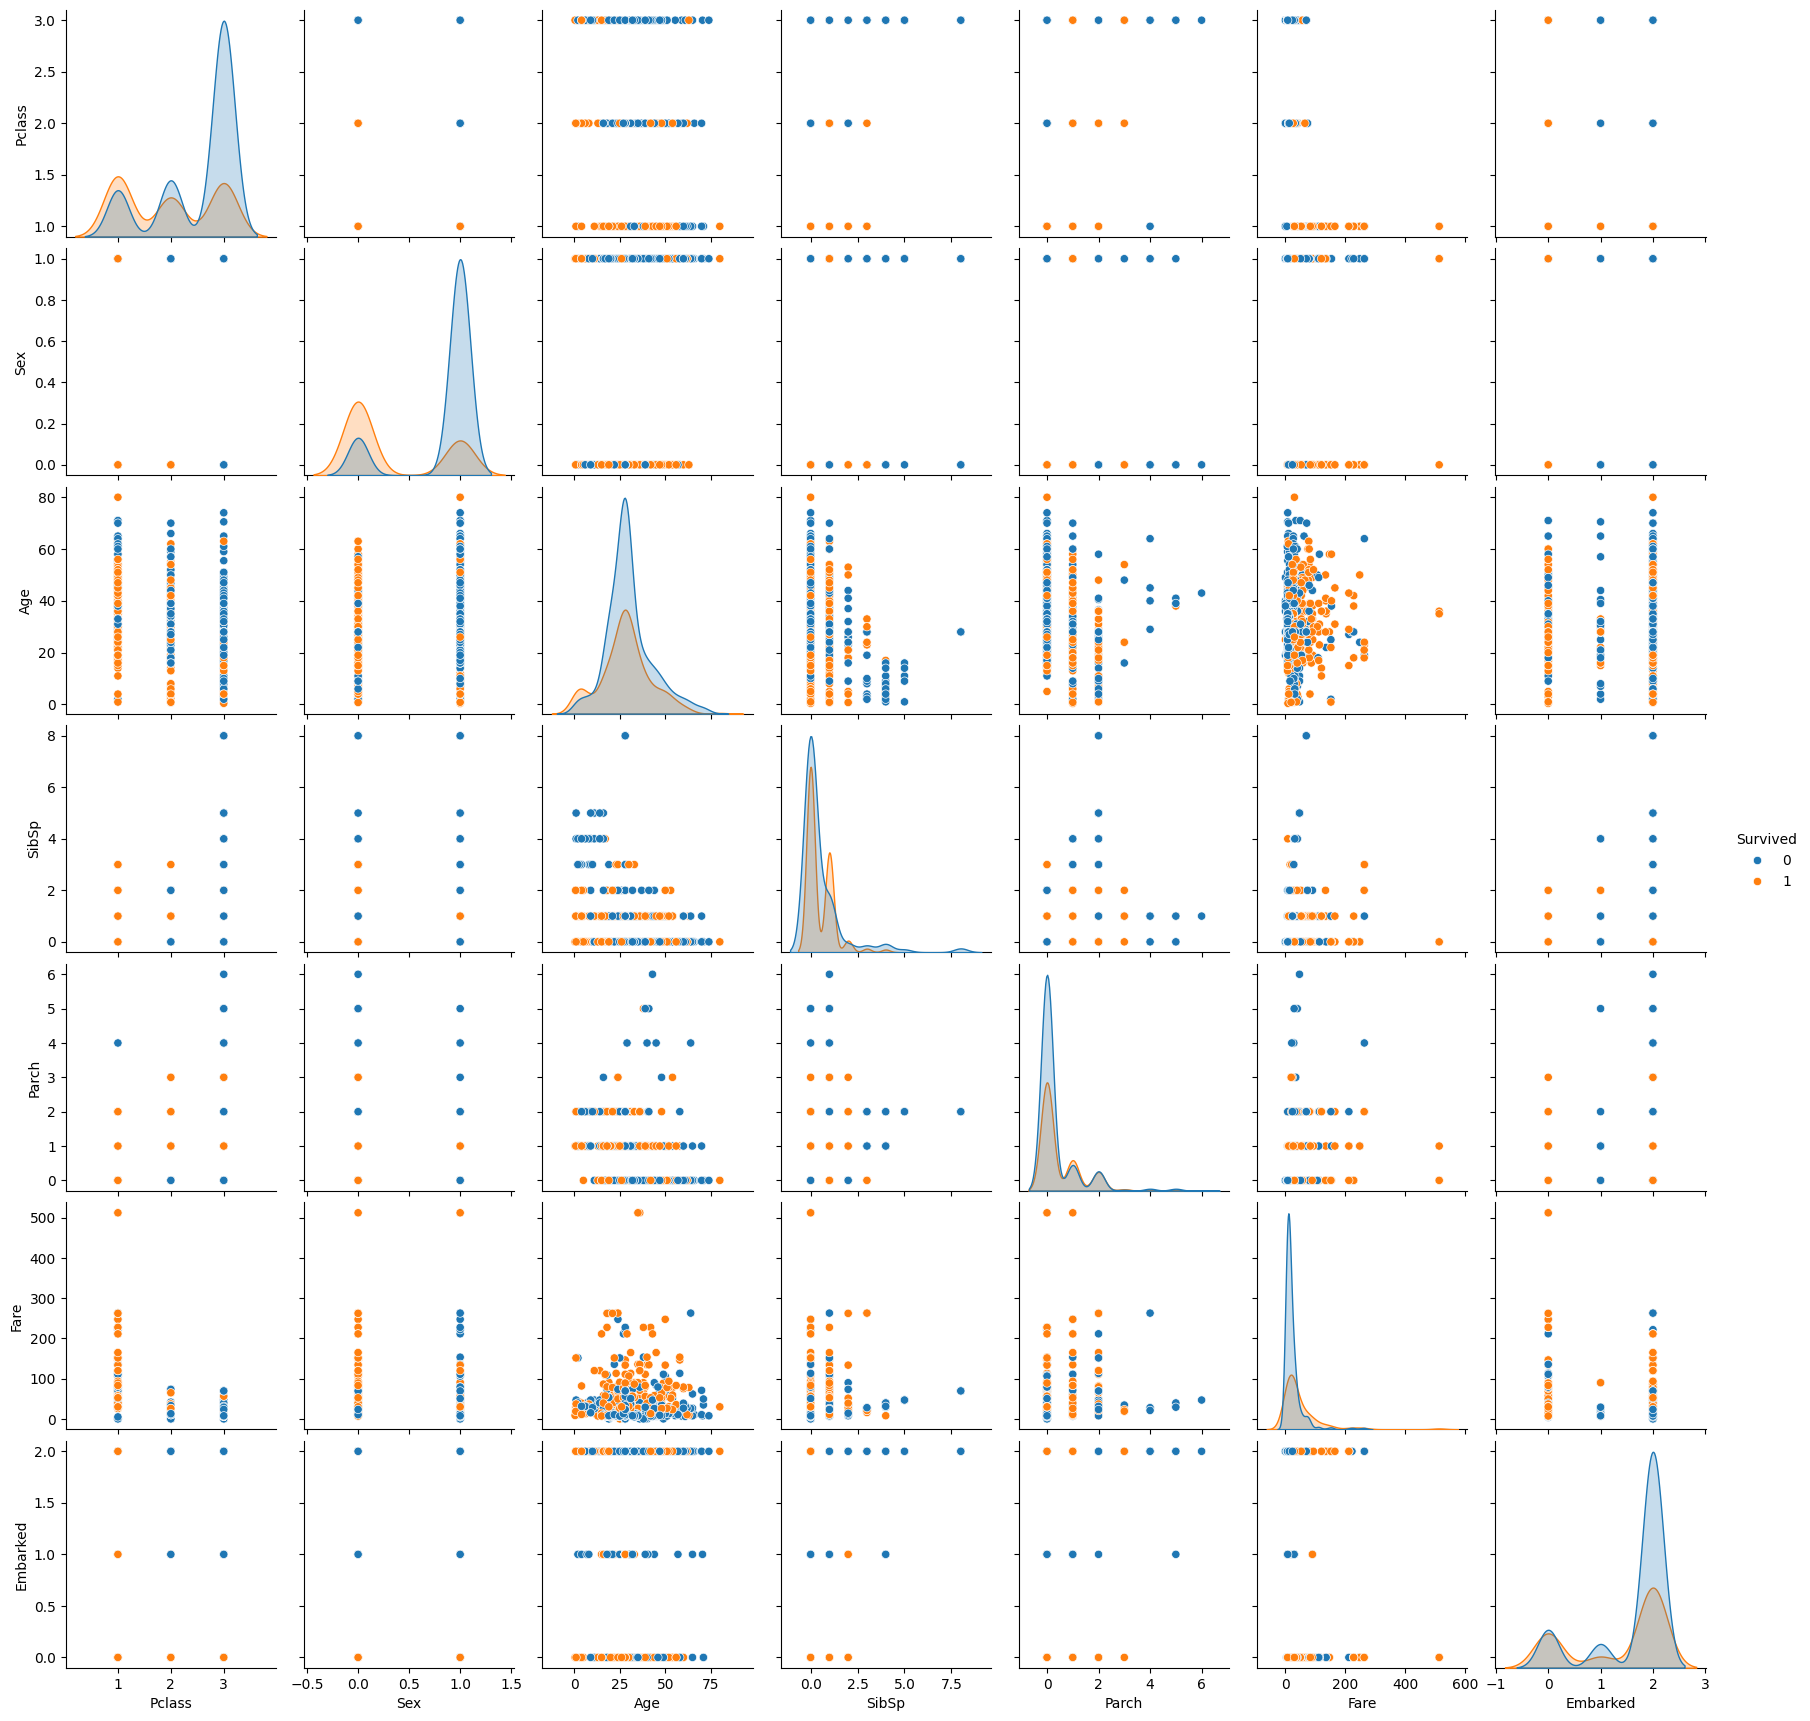

In [10]:
# Visualisation of current data with Survived as hue 
sns.pairplot(df, hue='Survived')

In [11]:
# X represents the feature set (independent variables) for your model
X = df.drop('Survived', axis=1)
# y represents the target variable (dependent variable) for your model
y = df['Survived']

In [12]:
# Split the data into training, development, and test sets
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.20, random_state=42)

In [13]:
# Train a decision tree model
model = DecisionTreeClassifier(random_state=42)
trained = model.fit(X_train, y_train)

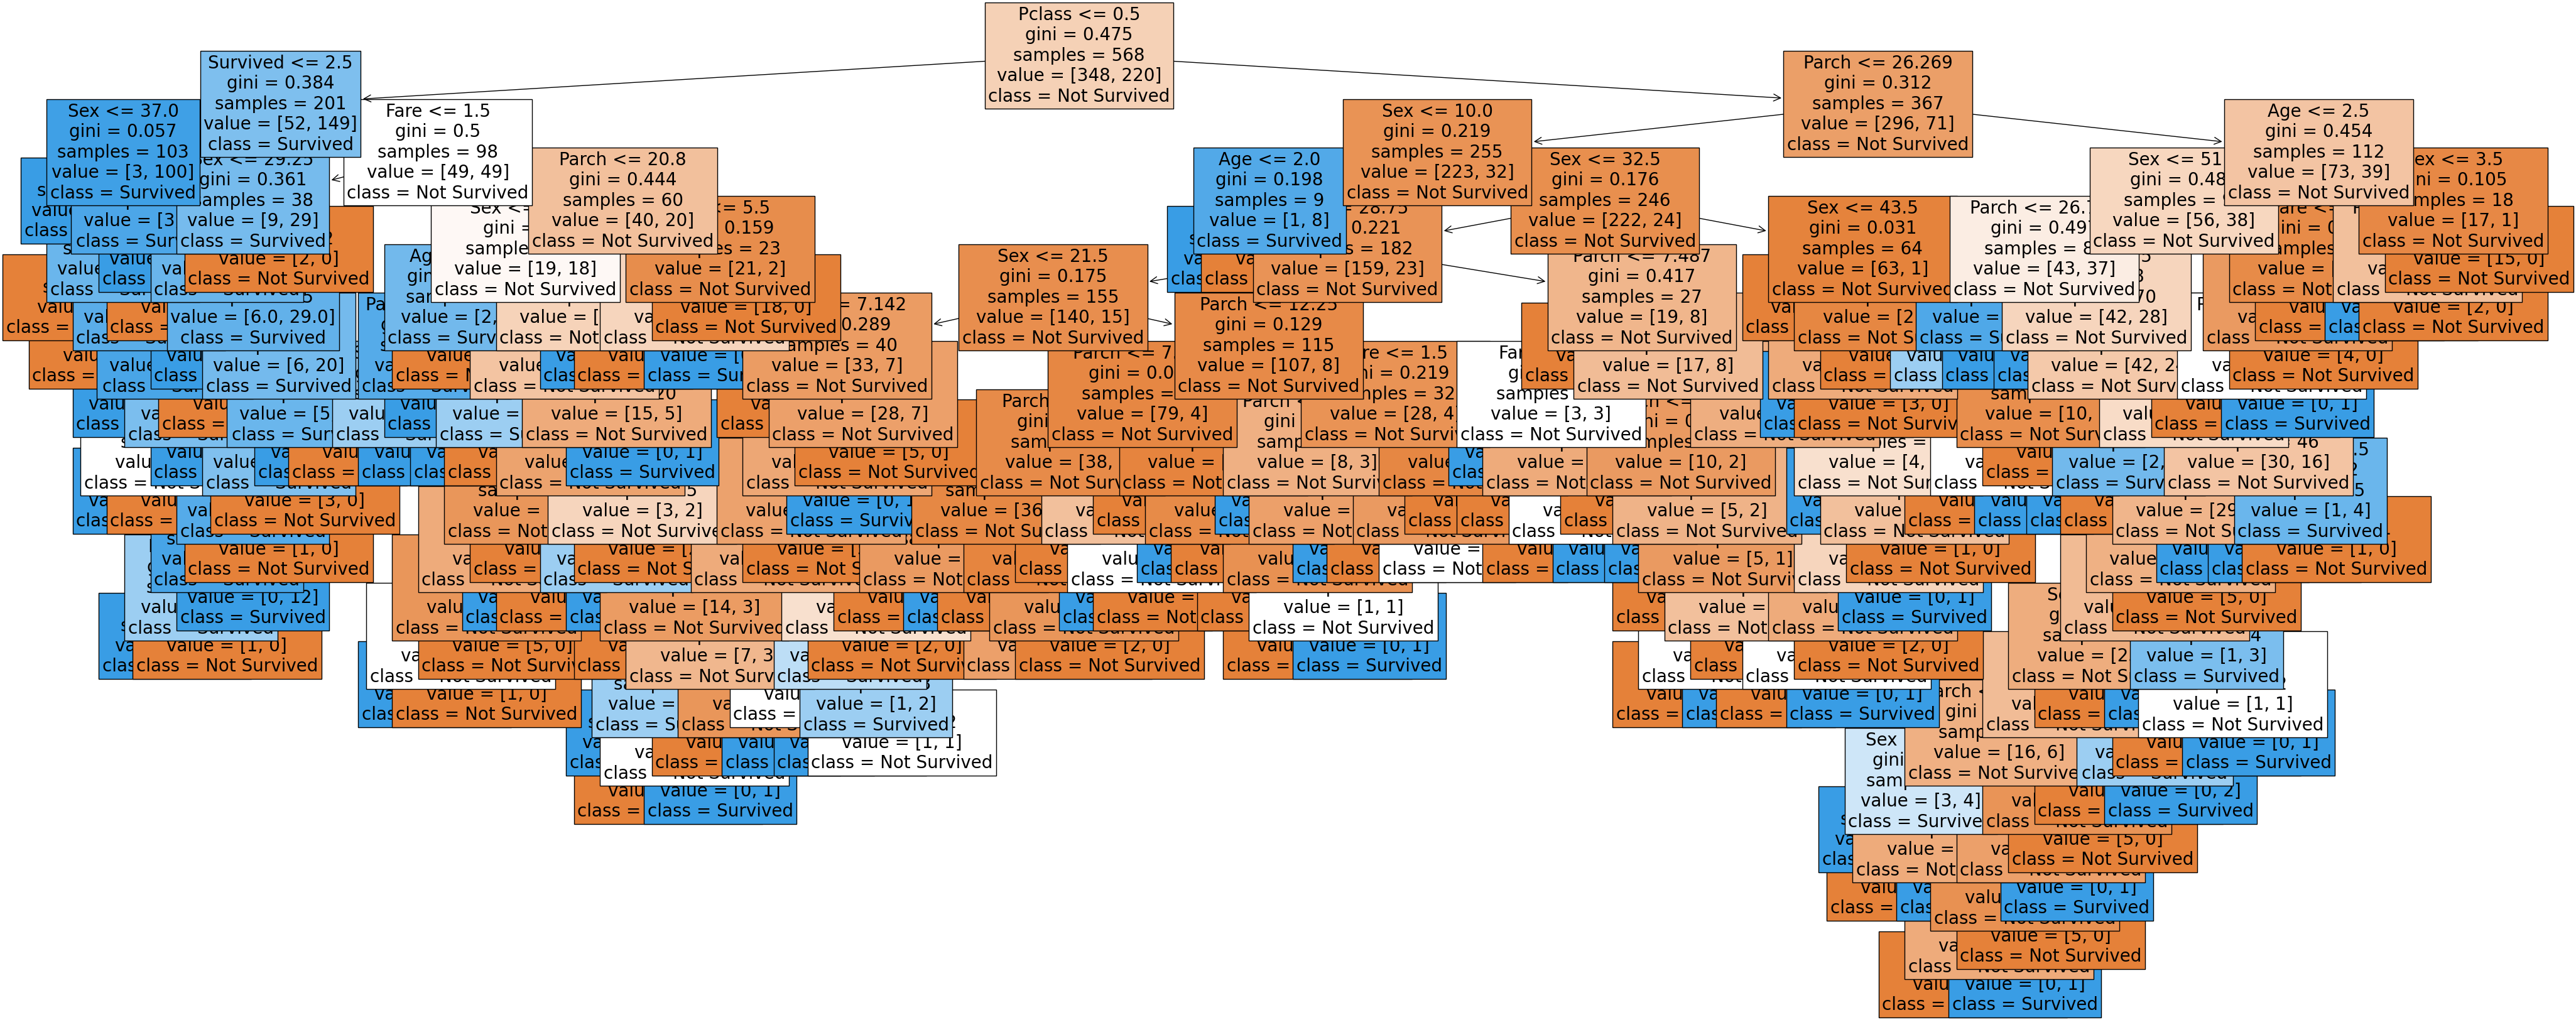

In [14]:
# Plot the decision tree with trained model
plt.figure(figsize=(50,20))
features = df.columns
classes = ['Not Survived','Survived']
tree.plot_tree(trained,feature_names=features,class_names=classes,filled=True,fontsize=20)
plt.show()

In [15]:
# Evaluate the model's accuracy on the development set
y_dev_pred = model.predict(X_dev)
print(f'Training Accuracy: {accuracy_score(y_dev, y_dev_pred)}')

Training Accuracy: 0.7622377622377622


In [16]:
# Try building the model with different max_depth values
max_depth_values = range(2, 11)
train_accuracy = []  # List to store training accuracies
dev_accuracy = []  # List to store development accuracies

# Iterate over the max_depth values
for depth in max_depth_values:
    # Create and train the model
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the training set and calculate accuracy
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracy.append(train_acc)

    # Predict on the development set and calculate accuracy
    dev_pred = model.predict(X_dev)
    dev_acc = accuracy_score(y_dev, dev_pred)
    dev_accuracy.append(dev_acc)

# Zip the max_depth values with their respective train and dev accuracies
results = list(zip(max_depth_values, train_accuracy, dev_accuracy))

print(tabulate(results, headers=['max_depth', 'train_accuracy', 'dev_accuracy'], tablefmt='fancy_outline',colalign=("center",)))

╒═════════════╤══════════════════╤════════════════╕
│  max_depth  │   train_accuracy │   dev_accuracy │
╞═════════════╪══════════════════╪════════════════╡
│      2      │         0.783451 │       0.776224 │
│      3      │         0.830986 │       0.804196 │
│      4      │         0.836268 │       0.804196 │
│      5      │         0.864437 │       0.783217 │
│      6      │         0.882042 │       0.804196 │
│      7      │         0.894366 │       0.811189 │
│      8      │         0.915493 │       0.804196 │
│      9      │         0.933099 │       0.797203 │
│     10      │         0.947183 │       0.818182 │
╘═════════════╧══════════════════╧════════════════╛


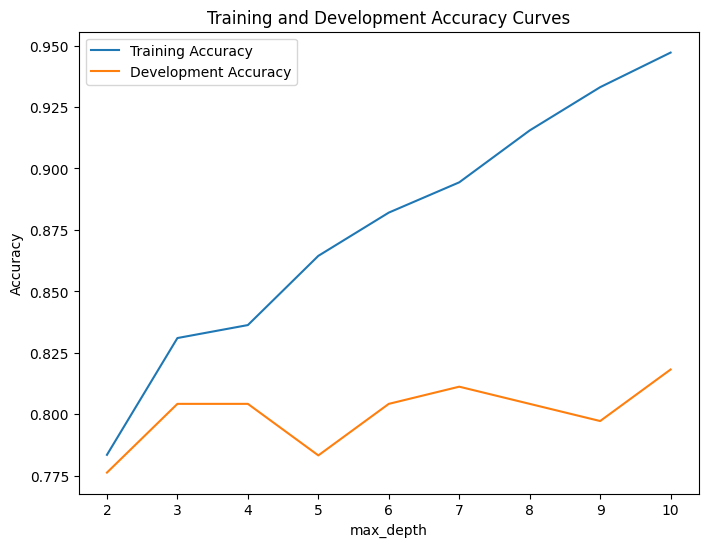

In [26]:
# Plot the training and development accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, train_accuracy, label='Training Accuracy')
plt.plot(max_depth_values, dev_accuracy, label='Development Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Training and Development Accuracy Curves')
plt.legend()
plt.show()

In [27]:
# Report the accuracy of the final model on the test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Final model accuracy on the test set: {test_accuracy}")

Final model accuracy on the test set: 0.8202247191011236


The model performed well in predicting the target variable or making accurate classifications on the given test data. Higher accuracy generally indicates that the model is able to make correct predictions more frequently.